In [358]:
import pandas as pd
from matplotlib import pyplot as plt

In [359]:
def dbscan(data, epsilon=7.5, minpts=3):
    cluster_num = 0
    for j in data.index.values.tolist():
        row = data.loc[j]
        
        if not pd.isna(row.cluster):
            continue
        
        neighbours = list(set([int(x.strip()) for x in row.neighbors.split(',')]))

        if len(neighbours) < minpts:
            data.loc[j, 'cluster'] = -1  # noise
            continue

        cluster_num += 1
        data.loc[j, 'cluster'] = cluster_num
        
        nn = list(set(neighbours) - set([j]))
        
        for i in nn:
            r = data.loc[i]
                
            if r.cluster == -1:
                data.loc[i, 'cluster'] = cluster_num
                continue
                
            if not pd.isna(r.cluster):
                continue
            
            data.loc[i, 'cluster'] = cluster_num
            
            new_neighbours = list(set([int(x.strip()) for x in r.neighbors.split(',')]))
            if len(new_neighbours) >= minpts:
                nn.extend(new_neighbours)

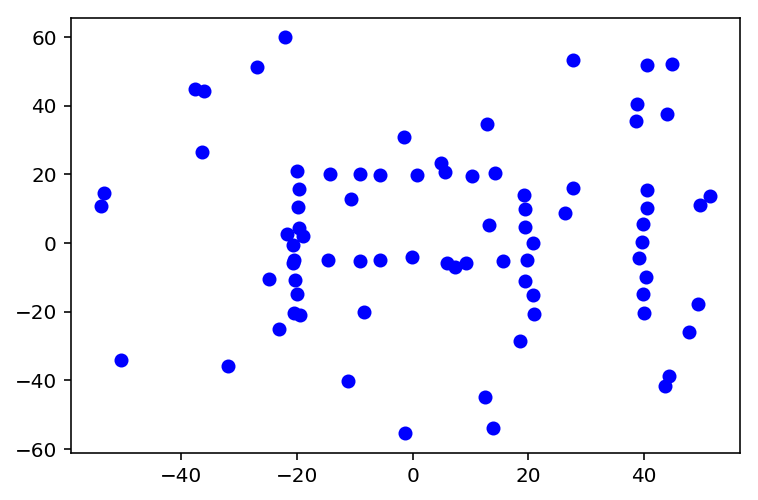

In [360]:
plt.plot(df.x, df.y, 'bo')

In [364]:
path = '../Data/dbscan.csv'
df = pd.read_csv(path)

In [365]:
# print(df.iloc[75].cluster)
dbscan(df)

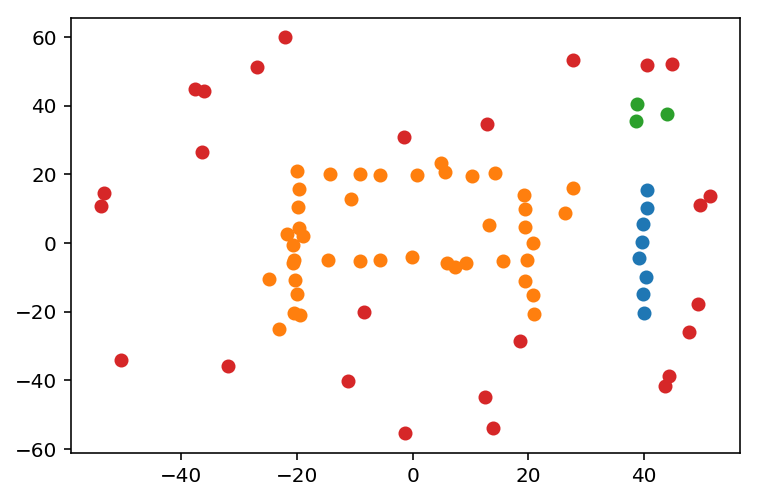

In [366]:
clusters = set(df.cluster.tolist())
for c in clusters:
    tmp = df[df['cluster'] == c]
    plt.plot(tmp.x, tmp.y, 'o')
